<a href="https://colab.research.google.com/github/ruchithareddy296/2216139_AIML_BootCamp/blob/main/assignment4(emissionsdata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
dataset="/content/drive/MyDrive/EmissionsData.csv"
import pandas as pd
df=pd.read_csv(dataset)
df.head(10)


,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0
5,5,3.5,230.0
6,6,3.5,232.0
7,7,3.7,232.0
8,8,3.7,255.0
9,9,2.4,267.0


In [28]:
df.shape

(14, 3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


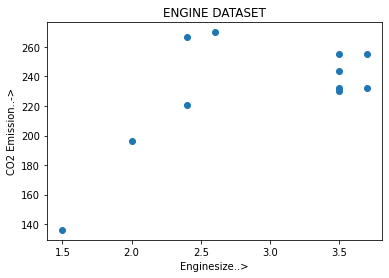

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
plt.xlabel("Enginesize..>")
plt.ylabel("CO2 Emission..->")
plt.title("ENGINE DATASET")
plt.show()

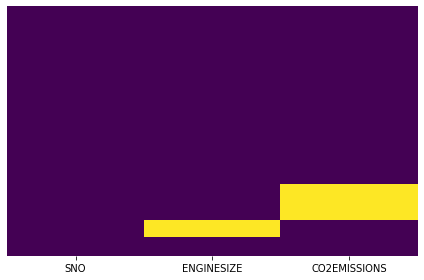

In [31]:
#impurities
import seaborn as sns
def heatmap(df):
 plt.figure(figsize=(6,4))
 sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)
 plt.tight_layout()
 return plt.show()
heatmap(df)


In [32]:
#step 3 
#preprocessing the dataset
#df=df.dropna()
#df.head()
import math
median_ENGINESIZE = math.floor(df.ENGINESIZE.median())
median_ENGINESIZE
median_CO2EMISSIONS=math.floor(df.CO2EMISSIONS.median())
median_CO2EMISSIONS


238

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df.ENGINESIZE = df.ENGINESIZE.fillna(median_ENGINESIZE)
df.CO2EMISSIONS = df.CO2EMISSIONS.fillna(median_CO2EMISSIONS)


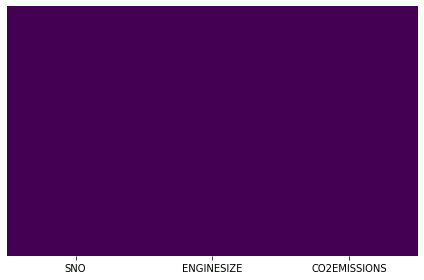

In [35]:
import seaborn as sns
def heatmap(df):
 plt.figure(figsize=(6,4))
 sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)
 plt.tight_layout()
 return plt.show()
heatmap(df)


In [36]:
#step4 preparing the data
x=df.iloc[0:,-2:-1].values
y=df.iloc[:,-1:].values

In [37]:
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [3. ],
       [2.6]])

In [38]:
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [238.],
       [238.],
       [269.],
       [270.]])

In [39]:
import numpy as np
x=np.array(df[['ENGINESIZE']])
y=np.array(df[['CO2EMISSIONS']])

In [40]:
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [3. ],
       [2.6]])

In [41]:
y


array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [238.],
       [238.],
       [269.],
       [270.]])

In [42]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [43]:
x_train

array([[2.5],
       [1.5],
       [2.6],
       [2.4],
       [2.4],
       [3.7],
       [3.5],
       [3.5],
       [2. ],
       [3.5],
       [3. ]])

In [44]:
y_train

array([[238.],
       [136.],
       [270.],
       [267.],
       [221.],
       [232.],
       [238.],
       [255.],
       [196.],
       [230.],
       [269.]])

In [45]:
x_test

array([[3.7],
       [3.5],
       [3.5]])

In [46]:
y_test

array([[255.],
       [232.],
       [244.]])

In [47]:
#training model-fitting the alogirthm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [48]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([[260.98840528],
       [254.67409918],
       [254.67409918]])

In [50]:
print("predicted value for training data:",model.score(x_train,y_train))


predicted value for training data: 0.3325385740991045


In [51]:
print("predicted value for testing data:",model.score(x_test,y_test))

predicted value for testing data: -1.5084842494604254


In [52]:
accuracy=model.score(x,y)*100
print(accuracy)

31.531993148487825


In [53]:
model.coef_


array([[31.5715305]])

In [54]:
model.intercept_


array([144.17374242])

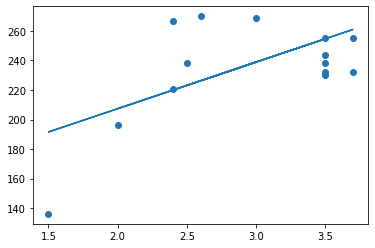

In [55]:
#plot linear regression
line=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

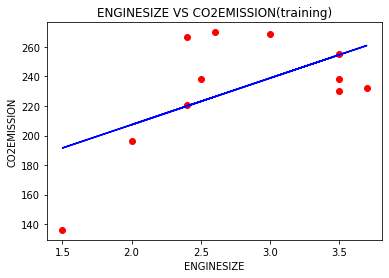

In [56]:
#Result for train
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('ENGINESIZE VS CO2EMISSION(training)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

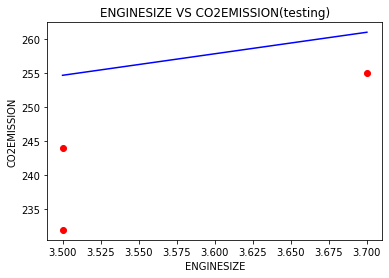

In [57]:
#result for test
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test),color='blue')
plt.title('ENGINESIZE VS CO2EMISSION(testing)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()